# CNN

## 1. Image Data

Image data는 픽셀들로 이루어져 있고 칼라 이미지의 경우 각 픽셀들은 3가지 색깔 (Red, Green, Blue)의 조합으로 표현 된다. 흑백이미지는 channel이 1개 존재한다.

## 2. Convolution Operation

[자세한 설명 자료](https://cs231n.github.io/convolutional-networks/)

Convolution operation은 이미지의 특징을 추출하는 역할을 한다.

$F\times F$ 사이즈의 Filter (Kernel)을 이용해서 $W_1\times H_1$크기의 Image (또는 feature map)을 처음부터 끝까지 훑으면서 $F\times F$ 크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력으로 한다.
- 일반적으로 filter (kernel) size는 $3\times 3$ 또는 $5 \times 5$를 쓴다

**Summary**
- $W_1 \times H_1 \times D_1$ 크기의 input을 받는다.
- Convolution 연산에서 필요한 Hyperparameters
  - Number of filters, $K$
  - Filter size, $F$
  - Stride, $S$
  - zero padding, $P$
- $W_2\times H_2\times D_2$ 크기의 output을 생성한다.
  - $W_2=(W_1-F+2P)/S + 1$
  - $H_2=(H_1-F+2P)/S + 1$
  - $D_2 = K$
- Parameter Sharing을 하는 경우 각 filter마다 $F\cdot F\cdot D_1$ 개의 weights이 존재하고 전체적으로 convolution 연산에 $(F\cdot F\cdot D_1)\cdot K$ 개의 weight이 필요.




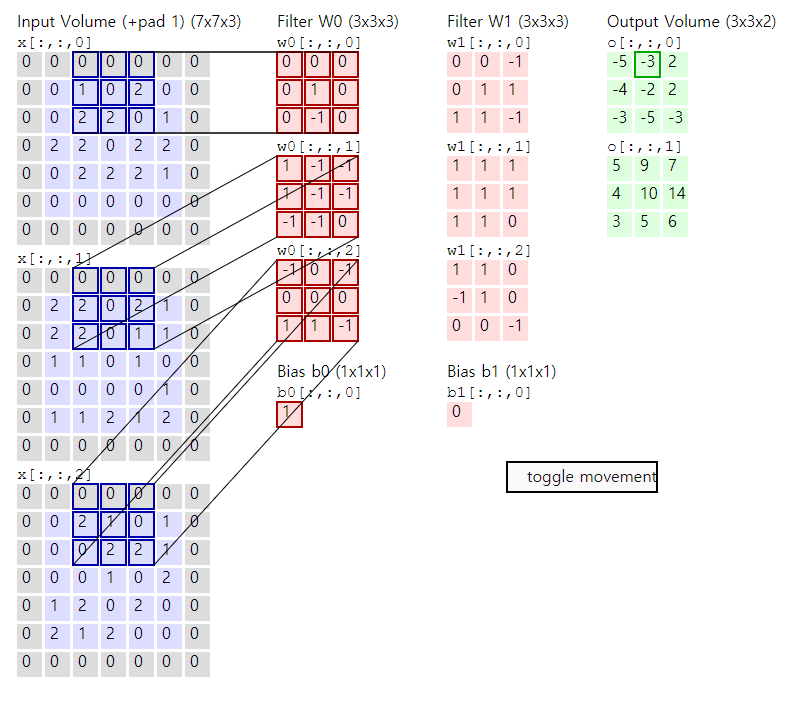

## 3. Pooling Operation

- $W_1 \times H_1 \times D_1$ 사이즈를 갖는 input을 받는다.
- 2개의 hyperparameters가 필요
  - their spatial extent (Filter size), $F$
  - the stride, $S$
- Output size는 $W_2 \times H_2 \times D_2$
  - $W_2 = (W_1 - F) / S + 1$
  - $H_2 = (H_1 - F) / S + 1$
  - D_2 = D_1
- Pooling operation에는 weight가 없다.
- Pooling 할 때는 보통 padding을 안 한다.

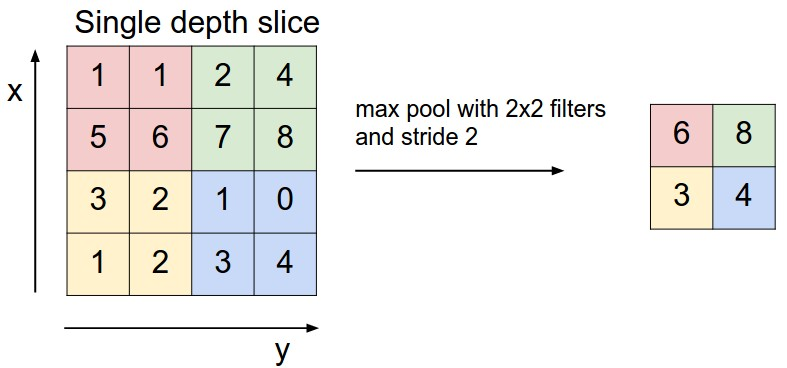

## 3. Operations with Pytorch

Pytorch에서는 Image 데이터를 (# Batch, # Channels, Height, Width)로 표현한다.

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [43]:
# 배치 크기 × 채널 × 높이(height) × 너비(widht)의 크기의 텐서를 선언
inputs = torch.Tensor(1, 1, 28, 28)
print(f"Tensor Size: {inputs.size()}")

Tensor Size: torch.Size([1, 1, 28, 28])


Conv Operation

In [44]:
conv = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)

In [45]:
conv_out = conv(inputs)

In [47]:
# (H + 2P - W) / S + 1
# (28 + 2 - 3) / 1 + 1 = 28
conv_out.shape

torch.Size([1, 32, 28, 28])

Pooling Operation

In [6]:
pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

In [7]:
pool_out = pool(inputs)

In [8]:
# (H - F) / S + 1
# (28 - 2) / 2 + 1
pool_out.shape

torch.Size([1, 1, 14, 14])

모델 만들어 보기

~~~python
# 1번 레이어 : 합성곱층(Convolutional layer)
Conv2d(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
MaxPool2d(kernel_size=2, stride=2))

# 2번 레이어 : 합성곱층(Convolutional layer)
Conv2d(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
MaxPool2d(kernel_size=2, stride=2))

# 3번 레이어 : 전결합층(Fully-Connected layer)
Feature Map을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136
FC Layer(뉴런 10개) + 활성화 함수 Softmax
~~~

- inputs: (1, 1, 28, 28)
- 1번 레이어 아웃풋의 모양: (1, 32, 28, 28) -> (1, 32, 14, 14)
- 2번 레이어 아웃풋의 모양: (1, 64, 14, 14) -> (1, 64, 7, 7)
- 3번 레이어의 인풋 모양: (1, 64 * 7 * 7)
- 3번 레이어의 아웃풋 모양: (1, 10)

In [10]:
conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
max1 = nn.MaxPool2d(kernel_size=2, stride=2)

conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
max2 = nn.MaxPool2d(kernel_size=2, stride=2)

In [39]:
x = F.relu(conv1(inputs))
x = max1(x)
x = F.relu(conv2(x))
x = max2(x)

In [41]:
x.shape

torch.Size([1, 64, 7, 7])

In [20]:
x.view([x.size(0), -1]).shape

torch.Size([1, 3136])

In [38]:
# Global avg Pooling
x.mean(dim=[2, 3]).shape

torch.Size([1, 64])

In [21]:
fc = nn.Linear(3136, 10)

In [26]:
# 정리 하면
x = F.relu(conv1(inputs))
x = max1(x)
x = F.relu(conv2(x))
x = max2(x)
x = x.view([x.size(0), -1])
x = fc(x)

In [27]:
x.shape

torch.Size([1, 10])

## 4. CNN으로 MNIST 분류

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

/home/hyunjun/anaconda3/envs/rs/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630839582/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # Flatten
        out = self.fc(out)
        return out

In [ ]:
# CNN 모델 정의
model = CNN().cuda()

In [ ]:
criterion = torch.nn.CrossEntropyLoss()    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
print(f"총 배치 수: {total_batch}")

총 배치 수: 600


In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.cuda()
        Y = Y.cuda()

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
    print(f"[Epoch: {epoch+1:>4}] cost={avg_cost:>.9f}")

[Epoch:    1] cost=0.216381878
[Epoch:    2] cost=0.062589467
[Epoch:    3] cost=0.044072814
[Epoch:    4] cost=0.036670368
[Epoch:    5] cost=0.030785682
[Epoch:    6] cost=0.024636934
[Epoch:    7] cost=0.020900004
[Epoch:    8] cost=0.017899849
[Epoch:    9] cost=0.014443074
[Epoch:   10] cost=0.012314761
[Epoch:   11] cost=0.010163534
[Epoch:   12] cost=0.009621887
[Epoch:   13] cost=0.007266982
[Epoch:   14] cost=0.005833558
[Epoch:   15] cost=0.006009925


In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().cuda()
    Y_test = mnist_test.test_labels.cuda()

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print(f"Accuracy: {accuracy.item()}")

Accuracy: 0.986799955368042


/home/hyunjun/anaconda3/envs/rs/lib/python3.8/site-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/hyunjun/anaconda3/envs/rs/lib/python3.8/site-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## 5. Deeper Model

~~~python
# 1번 레이어 : Convolutional layer
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 2번 레이어 : Convolutional layer
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 3번 레이어 : Convolutional layer
합성곱(in_channel = 64, out_channel = 128, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2, padding=1))

# 4번 레이어 : Fully-Connected layer
특성맵을 펼친다. # batch_size × 4 × 4 × 128 → batch_size × 2048
FC Layer(뉴런 625개) + 활성화 함수 ReLU

# 5번 레이어 : Fully-Connected layer
FC Layer(뉴런 10개) + 활성화 함수 Softmax
~~~

- input shape: (?, 1, 28, 28)
- conv1: (?, 32, 28, 28)
- max1: (?, 32, 14, 14)
- conv2: (?, 64, 14, 14)
- max2: (?, 64, 7, 7)
- conv3: (?, 128, 7, 7)
- max3: (?, 128, 4, 4)
- FC Layer input: (?, 128 * 4 * 4)

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
class DeeperCNN(torch.nn.Module):

    def __init__(self):
        super(DeeperCNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        )

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(4 * 4 * 128, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten
        out = self.fc(out)
        return out

In [ ]:
# CNN 모델 정의
model = DeeperCNN().cuda()

In [ ]:
criterion = torch.nn.CrossEntropyLoss()    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.cuda()
        Y = Y.cuda()

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

#     print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))
    print(f"[Epoch: {epoch+1:>4}] cost={avg_cost:>.9f}")

[Epoch:    1] cost=0.189914510
[Epoch:    2] cost=0.051524948
[Epoch:    3] cost=0.035180882
[Epoch:    4] cost=0.026254894
[Epoch:    5] cost=0.021323832
[Epoch:    6] cost=0.017792219
[Epoch:    7] cost=0.014919821
[Epoch:    8] cost=0.012340025
[Epoch:    9] cost=0.009627149
[Epoch:   10] cost=0.009564289
[Epoch:   11] cost=0.007556687
[Epoch:   12] cost=0.008079539
[Epoch:   13] cost=0.005640307
[Epoch:   14] cost=0.005618939
[Epoch:   15] cost=0.005385892


In [ ]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().cuda()
    Y_test = mnist_test.test_labels.cuda()

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print(f"Accuracy: {accuracy.item()}")

Accuracy: 0.9874999523162842


CIFAR-10 Dataset 이용해서 구현

In [ ]:
import torch
import torchvision

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True,
                                       transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=512,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


~~~pytorch
conv1 (in_channels=3, out_channels=6, kernel_size=5)
relu
maxpool2d (kernel_size=2, stride=2)

conv2 (in_channels=6, out_channels=16, kernel_size=5)
relu
maxpool2d (kernel_size=2, stride=2)

fc1 (16 * 5 * 5, 120)
relu
fc2 (120, 84)
relu
fc3 (84, 10)
~~~

- inputs: (?, 3, 32, 32)
- conv1: (?, 6, 28, 28)
- max1: (?, 6, 14, 14)
- conv2: (?, 16, 10, 10)
- max2: (?, 16, 5,5)

In [ ]:
inputs = torch.Tensor(1, 3, 32, 32)

In [ ]:
conv1 = nn.Conv2d(3, 6, 5)
max1 = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
max2 = nn.MaxPool2d(2, 2)

In [ ]:
max1(conv1(inputs)).shape

torch.Size([1, 6, 14, 14])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().cuda()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
n_epochs = 30
for epoch in range(n_epochs):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Statisics
        running_loss += loss.item()
      
    if epoch % 3 == 0:
        print(f"Epoch[{epoch+1}/{n_epochs}] loss:{running_loss / len(trainloader):.3f}")

print('Finished Training')

Epoch[1/30] loss:1.877
Epoch[4/30] loss:1.411
Epoch[7/30] loss:1.278
Epoch[10/30] loss:1.196
Epoch[13/30] loss:1.134
Epoch[16/30] loss:1.075
Epoch[19/30] loss:1.031
Epoch[22/30] loss:1.005
Epoch[25/30] loss:0.956
Epoch[28/30] loss:0.923
Finished Training


In [ ]:
# Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()

        # Predictions
        outputs = net(images)

        # Calculating Accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Accuracy of the network on the 10000 test image: {100*correct/total}%")

Accuracy of the network on the 10000 test image: 59.2%


## Pretrained Model 불러와서 학습시키기

In [ ]:
from torchvision import models

In [ ]:
resnet18_model = models.resnet18(pretrained=True)

In [ ]:
print(resnet18_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
n_classes = 10
n_filters = resnet18_model.fc.in_features

In [ ]:
resnet18_model.fc = nn.Linear(n_filters, n_classes)

In [ ]:
resnet18_model = resnet18_model.cuda()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18_model.parameters(), lr=0.001)

In [ ]:
n_epochs = 30
for epoch in range(n_epochs):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        outputs = resnet18_model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Statisics
        running_loss += loss.item()
      
    if epoch % 3 == 0:
        print(f"Epoch[{epoch+1}/{n_epochs}] loss:{running_loss / len(trainloader):.3f}")

print('Finished Training')

Epoch[1/30] loss:0.904
Epoch[4/30] loss:0.356
Epoch[7/30] loss:0.180
Epoch[10/30] loss:0.106
Epoch[13/30] loss:0.078
Epoch[16/30] loss:0.057
Epoch[19/30] loss:0.052
Epoch[22/30] loss:0.052
Epoch[25/30] loss:0.031
Epoch[28/30] loss:0.033
Finished Training


In [ ]:
# Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()

        # Predictions
        outputs = resnet18_model(images)

        # Calculating Accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Accuracy of the network on the 10000 test image: {100*correct/total}%")

Accuracy of the network on the 10000 test image: 81.41%
